In [1]:
import os
import pandas as pd
from typing import List, Tuple, Dict


def convertir_xlsx_a_csv(directorio_entrada: str, directorio_salida: str) -> None:
    """
    Convierte todos los archivos .xlsx en el directorio de entrada a archivos .csv en el directorio de salida.
    
    Args:
        directorio_entrada (str): La ruta del directorio donde se encuentran los archivos .xlsx.
        directorio_salida (str): La ruta del directorio donde se guardarán los archivos .csv.
    """
    # Crear el directorio de salida si no existe
    if not os.path.exists(directorio_salida):
        os.makedirs(directorio_salida)

    # Obtener la lista de todos los archivos .xlsx en el directorio de entrada
    archivos = [f for f in os.listdir(directorio_entrada) if f.endswith('.xlsx')]

    for archivo in archivos:
        # Construir la ruta completa del archivo de entrada
        ruta_entrada = os.path.join(directorio_entrada, archivo)
        
        # Leer el archivo Excel en un DataFrame
        df = pd.read_excel(ruta_entrada)

        # Crear la nueva ruta del archivo CSV en el directorio de salida
        nombre_sin_extension = os.path.splitext(archivo)[0]
        ruta_salida = os.path.join(directorio_salida, f"{nombre_sin_extension}.csv")

        # Guardar el DataFrame como archivo CSV en el directorio de salida
        df.to_csv(ruta_salida, index=False)

        print(f"Convertido: {ruta_entrada} -> {ruta_salida}")

# Ejemplo de uso
directorio_entrada = 'BasesDeDatosLimpias'
directorio_salida = 'BasesDeDatosLimpias_csv'
convertir_xlsx_a_csv(directorio_entrada, directorio_salida)

Convertido: BasesDeDatosLimpias/Moda para Hombre.xlsx -> BasesDeDatosLimpias_csv/Moda para Hombre.csv
Convertido: BasesDeDatosLimpias/Software.xlsx -> BasesDeDatosLimpias_csv/Software.csv
Convertido: BasesDeDatosLimpias/Todos los departamentos.xlsx -> BasesDeDatosLimpias_csv/Todos los departamentos.csv
Convertido: BasesDeDatosLimpias/Salud y productos para el hogar.xlsx -> BasesDeDatosLimpias_csv/Salud y productos para el hogar.csv
Convertido: BasesDeDatosLimpias/Tienda Kindle.xlsx -> BasesDeDatosLimpias_csv/Tienda Kindle.csv
Convertido: BasesDeDatosLimpias/Automotriz.xlsx -> BasesDeDatosLimpias_csv/Automotriz.csv
Convertido: BasesDeDatosLimpias/Industrial y científico.xlsx -> BasesDeDatosLimpias_csv/Industrial y científico.csv
Convertido: BasesDeDatosLimpias/Moda de niños.xlsx -> BasesDeDatosLimpias_csv/Moda de niños.csv
Convertido: BasesDeDatosLimpias/Videojuegos.xlsx -> BasesDeDatosLimpias_csv/Videojuegos.csv
Convertido: BasesDeDatosLimpias/Música MP3.xlsx -> BasesDeDatosLimpias_csv

In [2]:
def revisar_compatibilidad_csvs(directorio: str) -> Tuple[bool, Dict[str, List[str]]]:
    """
    Revisa si todos los archivos CSV en un directorio tienen el mismo número de columnas y los mismos nombres de columnas.

    Args:
        directorio (str): La ruta del directorio donde se encuentran los archivos CSV.

    Returns:
        Tuple[bool, Dict[str, List[str]]]: Una tupla donde el primer valor es un booleano que indica si todos los archivos
                                            son compatibles y el segundo valor es un diccionario que contiene el nombre 
                                            de cada archivo y sus respectivas columnas.
    """
    archivos_csv = [os.path.join(directorio, archivo) for archivo in os.listdir(directorio) if archivo.endswith('.csv')]
    
    columnas_referencia = None
    columnas_por_archivo = {}
    
    for ruta_archivo in archivos_csv:
        try:
            # Leer solo la cabecera del archivo para obtener las columnas
            columnas = pd.read_csv(ruta_archivo, nrows=0).columns.tolist()
            columnas_por_archivo[os.path.basename(ruta_archivo)] = columnas
            
            if columnas_referencia is None:
                columnas_referencia = columnas
            else:
                # Comparar con las columnas de referencia
                if columnas != columnas_referencia:
                    return False, columnas_por_archivo
        except Exception as e:
            print(f"Error al leer el archivo {ruta_archivo}: {e}")
            return False, columnas_por_archivo
    
    return True, columnas_por_archivo

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = 'BasesDeDatosLimpias_csv'

# Revisar compatibilidad de los archivos CSV en el directorio
compatibles, columnas_archivos = revisar_compatibilidad_csvs(ruta_directorio)

if compatibles:
    print("Todos los archivos CSV son compatibles en nombre y número de columnas.")
else:
    print("Los archivos CSV no son compatibles. Detalles:")
    for archivo, columnas in columnas_archivos.items():
        print(f"Archivo: {archivo} - Columnas: {columnas}")

Todos los archivos CSV son compatibles en nombre y número de columnas.


In [3]:
def leer_archivo(ruta_archivo: str, encoding: str = 'utf-8') -> pd.DataFrame:
    """
    Lee un archivo CSV o Excel y añade una columna 'categoría' con el nombre del archivo sin extensión.
    
    Args:
        ruta_archivo (str): La ruta completa del archivo CSV o Excel.
        encoding (str): Codificación a usar para leer el archivo CSV.
    
    Returns:
        pd.DataFrame: El DataFrame con los datos del archivo y la nueva columna 'categoría'.
    """
    try:
        if ruta_archivo.endswith('.csv'):
            # Leer el archivo CSV en un DataFrame
            df = pd.read_csv(ruta_archivo, encoding=encoding)
        elif ruta_archivo.endswith('.xlsx'):
            # Leer el archivo Excel en un DataFrame
            df = pd.read_excel(ruta_archivo)
        else:
            raise ValueError("Formato de archivo no soportado: solo se admiten archivos .csv y .xlsx")

    except UnicodeDecodeError:
        if ruta_archivo.endswith('.csv'):
            # Si falla con utf-8, intenta con latin1
            df = pd.read_csv(ruta_archivo, encoding='latin1')
        else:
            raise ValueError("Error de codificación en archivo Excel")

    # Obtener solo el nombre del archivo sin la extensión
    nombre_archivo_sin_extension = os.path.splitext(os.path.basename(ruta_archivo))[0]

    # Añadir una nueva columna 'categoría' con el nombre del archivo sin la extensión
    df['categoria'] = nombre_archivo_sin_extension

    return df

In [4]:
def obtener_archivos_directorio(directorio: str) -> List[str]:
    """
    Obtiene una lista de rutas de archivos en un directorio dado.
    
    Args:
        directorio (str): La ruta del directorio donde se encuentran los archivos.
    
    Returns:
        List[str]: Lista de rutas completas de los archivos dentro del directorio.
    """
    # Obtener la lista de archivos en el directorio
    archivos = [
        os.path.join(directorio, archivo)
        if os.path.isfile(os.path.join(directorio, archivo))
        else None
        for archivo in os.listdir(directorio)
    ]
    
    # Filtrar cualquier valor None (que no sean archivos)
    return [archivo for archivo in archivos if archivo is not None]

In [5]:
def combinar_archivos(directorio: str) -> pd.DataFrame:
    """
    Combina todos los archivos CSV y Excel en un directorio en un solo DataFrame, añadiendo una columna 'categoría'.
    
    Args:
        directorio (str): La ruta del directorio que contiene los archivos.
    
    Returns:
        pd.DataFrame: Un DataFrame que combina todos los datos de los archivos con una columna 'categoría'.
    """
    # Obtener las rutas de los archivos en el directorio
    rutas_archivos = obtener_archivos_directorio(directorio)

    # Leer y combinar todos los DataFrames de los archivos
    dataframes = [leer_archivo(ruta) for ruta in rutas_archivos]

    # Concatenar todos los DataFrames en uno solo
    df_combinado = pd.concat(dataframes, ignore_index=True)

    return df_combinado

In [6]:
# Combinar los archivos en el directorio especificado
ruta_directorio = 'BasesDeDatosLimpias_csv'
df_resultante = combinar_archivos(ruta_directorio)
print(df_resultante)

# Especifica la ruta y el nombre del archivo CSV de salida
ruta_csv_salida = os.path.join(ruta_directorio, 'df_resultante.csv')

# Guardar el DataFrame como archivo CSV
df_resultante.to_csv(ruta_csv_salida, index=False)

print(f"Archivo guardado: {ruta_csv_salida}")

                                          link_producto  \
0     https://www.amazon.com/-/es/sspa/click?ie=UTF8...   
1     https://www.amazon.com/-/es/AUTOMET-Sudaderas-...   
2     https://www.amazon.com/-/es/Saodimallsu-casqui...   
3     https://www.amazon.com/-/es/AUTOMET-Chaqueta-b...   
4     https://www.amazon.com/-/es/LILLUSORY-C%C3%A1r...   
...                                                 ...   
7423  https://www.amazon.com/-/es/l%C3%A1pices-color...   
7424  https://www.amazon.com/FC14328-Faber-Castell/d...   
7425  https://www.amazon.com/-/es/Sign-World-Best-MA...   
7426  https://www.amazon.com/-/es/refrigerador-manua...   
7427  https://www.amazon.com/manualidades-arcilla-or...   

                                               producto        asin  precio  \
0                  Amazon Essentials Legging para mujer  B08JG6WYDG   18.00   
1     AUTOMET Sudaderas con media cremallera para mu...  B0C7KBZXL6   32.99   
2     Saodimallsu - Suéter de manga casquillo, de ve..

In [7]:
num_duplicados = df_resultante.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


In [8]:
!pip show nltk

Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: click, joblib, regex, tqdm
Required-by: open-interpreter


In [9]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to /Users/juan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           Token  Frecuencia
0          niños        1626
1          juego        1133
2       pulgadas         959
3          niñas         930
4            kit         632
5           años         631
6        edition         581
7       juguetes         572
8          mujer         561
9       equipaje         547
10       spanish         542
11         manga         540
12           the         529
13        piezas         519
14        juegos         504
15  manualidades         460
16        perros         457
17           and         454
18       paquete         442
19         hogar         425


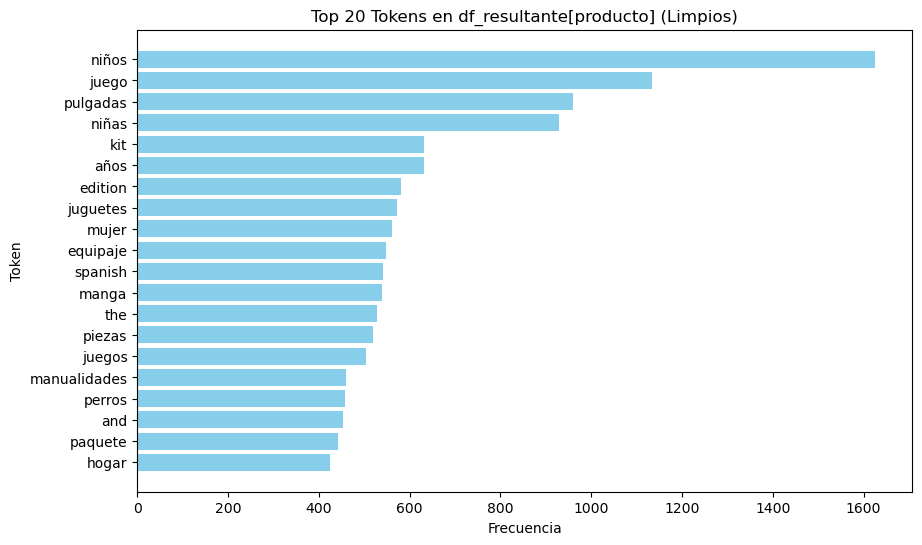

In [10]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Descargar el set de stopwords (palabras sin valor semantico)
nltk.download('stopwords')

# Asegúrate de que df_resultante esté disponible
# Paso 1: Limpiar el texto en la columna 'producto'

# Crear una lista de stopwords en español (puedes personalizarla si lo deseas)
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto: str) -> str:
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres especiales y mantener solo letras y números
    texto = re.sub(r'[^a-záéíóúñ0-9\s]', '', texto)
    # Eliminar números (opcional, dependiendo del análisis)
    texto = re.sub(r'\b\d+\b', '', texto)
    # Eliminar stop words
    tokens = texto.split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar la función de limpieza a la columna 'producto'
df_resultante['producto_limpio'] = df_resultante['producto'].astype(str).apply(limpiar_texto)

# Paso 2: Concatenar y tokenizar el texto limpio
texto_concatenado = ' '.join(df_resultante['producto_limpio'])

# Tokenizar el texto en palabras
tokens = texto_concatenado.split()

# Contar la frecuencia de cada token
contador_tokens = Counter(tokens)

# Obtener los 20 tokens más comunes
top_20_tokens = contador_tokens.most_common(20)

# Crear un DataFrame con los tokens y sus frecuencias
df_top_20 = pd.DataFrame(top_20_tokens, columns=['Token', 'Frecuencia'])

# Mostrar el DataFrame resultante
print(df_top_20)

# Paso 3: Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df_top_20['Token'], df_top_20['Frecuencia'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Token')
plt.title('Top 20 Tokens en df_resultante[producto] (Limpios)')
plt.gca().invert_yaxis()  # Invertir el eje y para que el token más frecuente esté en la parte superior
plt.show()